# **AM 207**: Homework 1

Verena Kaynig-Fittkau and Pavlos Protopapas  <br>
**Due: 11.59 P.M. Thursday February 18th, 2015**

### Instructions:

+ Upload your answers in an ipython notebook to Canvas.

+ We will provide you imports for your ipython notebook. Please do not import additional libraries.

+ Your individual submissions should use the following filenames: AM207_YOURNAME_HW1.ipynb

+ Your code should be in code cells as part of your ipython notebook. Do not use a different language (or format). 

+ **Do not just send your code. The homework solutions should be in a report style. Be sure to add comments to your code as well as markdown cells where you describe your approach and discuss your results. **

+ Please submit your notebook in an **executed** status, so that we can see all the results you computed. However, we will still run your code and all cells should reproduce the output when executed. 

+ If you have multiple files (e.g. you've added code files or images) create a tarball for all files in a single file and name it: AM207_YOURNAME_HW1.tar.gz or AM207_YOURNAME_HW1.zip


### Have Fun!
_ _ _ _ _

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time

import scipy.stats 

/Users/charlesliu/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Problem 1: By a Needles Length

![Alt Buffon Needle](figures/Buffon_needle.gif)
We discussed how to use Buffon's needle to estimate $\pi$ during lecture, using the probability of the needle crossing a line of a floor tile. Using Monte Carlo simulation, estimate the probability of the needle crossing a floor line as a function of the needle's length. Assume that the distance between floor lines is 1 unit, and your needle manufacturer provides you with needles of different length in 0.1 increments with a maximum length of 1 unit. Plot a histogram of your results and compare your results to the analytical solution from the lecture:
$$P = \frac{2 \cdot l}{t \cdot \pi}$$

where $l$ is the length of the needle and $t$ is the distance beweent the floor tiles

In a next step extend your simulation to a maximum needle length of 2 units, still using 0.1 increments. Compare your results to the same formula for the intersection. Why do your results now diverge from the analytical solution given above? What would you need to do to correct the analytical formula? It is ok to just describe the integral you need to solve analytically, and why it looks this way. No need to actually do the integration by hand. 

**Please answer this problem by adding cells here.**

In [2]:
"""
First we define a function that takes in the needle length, tile length, and number of trials to run and
outputs the average number of times a tile was crossed. All we need to randomize is the selection of the
distance from the center of a needle to the closest line and the acute angle between the needle/line
"""
def isCrossed(x,n_length,theta):
    if x <= np.sin(theta)*n_length/2.0:
        return 1
    return 0

def buffon_trial(n_length, t_length, trials):
    dists = np.random.uniform(low=0, high=t_length/2.0, size=trials)
    angles = np.random.uniform(low=0, high=np.pi/2.0, size=trials)
    crosses = map(lambda x: isCrossed(dists[x],n_length,angles[x]),np.arange(trials))
    return np.mean(crosses)

---------------------------
Needle Length:  0.1
---------------------------
Exact:  0.0636619772368
Mean:  0.063965
Standard deviation:  0.00792980296098
---------------------------
---------------------------
Needle Length:  0.2
---------------------------
Exact:  0.127323954474
Mean:  0.127366
Standard deviation:  0.0105170358942
---------------------------
---------------------------
Needle Length:  0.3
---------------------------
Exact:  0.19098593171
Mean:  0.191378
Standard deviation:  0.0123351171863
---------------------------
---------------------------
Needle Length:  0.4
---------------------------
Exact:  0.254647908947
Mean:  0.254604
Standard deviation:  0.0134168991947
---------------------------
---------------------------
Needle Length:  0.5
---------------------------
Exact:  0.318309886184
Mean:  0.318882
Standard deviation:  0.0146148580561
---------------------------
---------------------------
Needle Length:  0.6
---------------------------
Exact:  0.381971863421


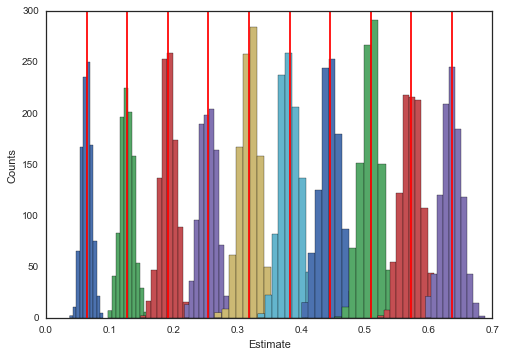

In [3]:
"""
Now with our buffon_trial function, we will iterate through .1 - 1 in .1 increments with 1000 trials
of 1000 trials. For each iteration we will plot a histogram of the results and compare it to the analytical 
solution
"""
n_lengths = np.arange(.1,1.1,.1)
t_length = 1
trials = 1000
for n_length in n_lengths:
    exact = (2*n_length)/(t_length*np.pi)
    estimates = map(lambda x: buffon_trial(n_length, t_length, trials), np.zeros(trials))
    plt.hist(estimates)
    plt.xlabel("Estimate")
    plt.ylabel("Counts")
    plt.axvline(x=exact, color='r')
    print "---------------------------"
    print "Needle Length: ", n_length
    print "---------------------------"
    print "Exact: ", exact
    print "Mean: ", np.mean(estimates)
    print "Standard deviation: ", np.std(estimates)
    print "---------------------------"

---------------------------
Needle Length:  0.1
---------------------------
Exact:  0.0636619772368
Mean:  0.06373
Standard deviation:  0.00773751252018
---------------------------
---------------------------
Needle Length:  0.2
---------------------------
Exact:  0.127323954474
Mean:  0.126973
Standard deviation:  0.0105774416094
---------------------------
---------------------------
Needle Length:  0.3
---------------------------
Exact:  0.19098593171
Mean:  0.190975
Standard deviation:  0.0125741948052
---------------------------
---------------------------
Needle Length:  0.4
---------------------------
Exact:  0.254647908947
Mean:  0.25421
Standard deviation:  0.0138966146957
---------------------------
---------------------------
Needle Length:  0.5
---------------------------
Exact:  0.318309886184
Mean:  0.31861
Standard deviation:  0.0147438766951
---------------------------
---------------------------
Needle Length:  0.6
---------------------------
Exact:  0.381971863421
Mea

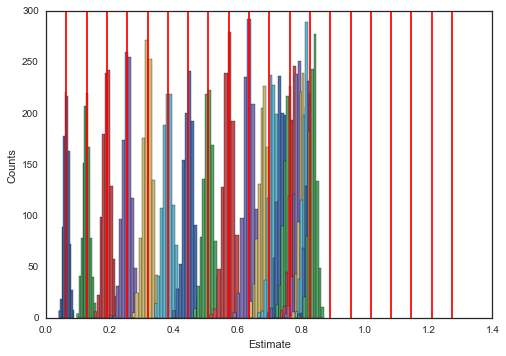

In [4]:
"""
Copied from above with needle length now up to 2
"""
n_lengths = np.arange(.1,2.1,.1)
t_length = 1
trials = 1000
for n_length in n_lengths:
    exact = (2*n_length)/(t_length*np.pi)
    estimates = map(lambda x: buffon_trial(n_length, t_length, trials), np.zeros(trials))
    plt.hist(estimates)
    plt.xlabel("Estimate")
    plt.ylabel("Counts")
    plt.axvline(x=exact, color='r')
    print "---------------------------"
    print "Needle Length: ", n_length
    print "---------------------------"
    print "Exact: ", exact
    print "Mean: ", np.mean(estimates)
    print "Standard deviation: ", np.std(estimates)
    print "---------------------------"

Once the needle length exceeds 1, the length between tiles, the analytical solution starts overestimating the probability. The analytical solution is taking an integral, given an acute angle $\theta$, from 0 to $\frac{l}{2}sin\theta$. This is now an overestimation when the length of the needle is larger than the length between tiles, as $\frac{t}{2}$, the maximum length needed to get to the tile, can be less than that value. The integral is then not from 0 to $\frac{l}{2}sin\theta$ but only to $min(\frac{l}{2}sin\theta, \frac{t}{2}$)

# Problem 2: Simple Integration

Write a function that estimates the value of a given one dimensional integral Monte Carlo style. 
The function should have the following signature:

`estimate_integral_MC(function_to_integrate, lower_bound, upper_bound, number_of_samples, number_of_tries)`

Where `number_of_tries` is used to calculate the standard deviation of the estimated value of the integral. 

Test your function by solving the following integrals:

* $ \int_0^3 x^{\frac{x}{4}} \,dx$
* $ \int_0^1 \log x \cdot \log(1-x) \,dx $.


**Please answer this problem by adding cells here.**

In [5]:
"""
Standard method of taking uniforms over the bounds and multiplying by the bounds
"""
def estimate_integral_MC(function_to_integrate, lower_bound, upper_bound, number_of_samples, number_of_tries):
    estimates = [0]*number_of_tries
    for trial in range(number_of_tries):
        X = np.random.uniform(low=lower_bound, high=upper_bound, size=number_of_samples)
        Y = function_to_integrate(X)
        estimates[trial] = np.mean(Y)*(upper_bound-lower_bound)
    return np.mean(estimates), np.std(estimates)

In [6]:
"""
Test for x^(x/4) from 0 to 3
"""
estimate_integral_MC(lambda x: np.power(x,x/4.0), 0, 3, 1000, 1000)

(3.9133150662213301, 0.038181348807200984)

In [7]:
"""
Test for logx*log(1-x) from 0 to 1
"""
estimate_integral_MC(lambda x: np.log(x)*np.log(1-x), 0, 1, 1000, 1000)

(0.35503535684192927, 0.0038625468326853665)

# Problem 3: The Donut Estimation

You bought a nice donut for yourself and decided to eat it in the evening while working on your AM207 assignments. 
Unfortunately you live in a shared apartment and your roommate got hold of the donut in the kitchen. It seems that he first
cut off a small piece from the bottom, but then discovered how delicious the donut was and proceeded to cut off an additional large part. Discovering the donut theft in the evening you decide to confront your roommate, but you want to present hard facts and estimate how much of your original donut was left. 

Think of the donut as a 3D object(refer to the following picture). You model the donut as a torus centered at the origin`(0,0,0)` with outer radius `R=4` and inner radius `r=2`. Points $(x,y,z)$ inside the torus then are described by the following condition: 
$$z^2 + (\sqrt{x^2 + y^2} - c)^2 \leq a^2,$$
where $c$ is the radius from origin to the center of the torus tube, and $a$ is the radius of the donut tube, the cross section of the donut tube is a circle.

Your roomates cuts were first parallel to the x axis at y = -3, and then parallel to the y axis at x = 1.

To estimate the weight of the donut you need to solve the integral

$$ \int_V \rho \,dx \,dy \,dz $$.

Where $\rho$ is the density of the donut and $V$ is the volume. As you are just interested in the percentage of the whole donut you got to eat, you can just assume $\rho=1$.

The weight of the whole original donut then was:

$$ (\pi a^2)\cdot(2 \cdot \pi \cdot c) $$

What is the percentage of the donut your room mate left for you to eat? Don't forget to estimate the error as well!




**Please answer this problem by adding cells here.**

In [8]:
"""
First we need to convert from R,r to a,c in the formula. Given these definitions:
R - r = diameter of donut tube, meaning a = (R-r)/2
c = r + a
"""
R = 4
r = 2
a = (R-r)/2.0
c = r + a
a,c

(1.0, 3.0)

In [9]:
"""
Let's now estimate the full weight of the donut, it should be close to the formula outlined
We'll run 1000 trials of 1000 samples
The bounds for x,y are calculated by setting all variables equal to 0 and solving for
ranges
"""
orig_weight = (np.pi*np.power(a,2))*(2*np.pi*c)
print "Original weight: ", orig_weight
N = 1000
estimates = [0]*N
for i in range(N):
    X = np.random.uniform(low=-c-a, high=c+a, size=N)  
    Y = np.random.uniform(low=-c-a, high=c+a, size=N)   
    Z = np.random.uniform(low=-a, high=a, size=N)
    F = np.power(Z,2) + np.power(np.power(np.power(X,2) + np.power(Y,2), .5)-c,2)
    estimates[i] = np.sum(F<=np.power(a,2))*1./N*(8*np.power(c+a,2)*a)
#number of points inside range/total number of points * area of box 2(c+a) x 2(c+a) x 2a
print "Estimate: {}, Std Error: {}".format(np.mean(estimates), np.std(estimates))

Original weight:  59.2176264065
Estimate: 59.260416, Std Error: 2.00431495004


Looks like our method is working for the full donut weight case, now we restrict on y >= -3 and x <= 1 simultaneously and calculate the ratio of weights

In [10]:
estimates = [0]*N
for i in range(N):
    X = np.random.uniform(low=-c-a, high=1, size=N)  
    Y = np.random.uniform(low=-3, high=c+a, size=N)
    Z = np.random.uniform(low=-a, high=a, size=N)
    F = np.power(Z,2) + np.power(np.power(np.power(X,2) + np.power(Y,2), .5)-c,2)
    #now area of box is (c+a+1) x (c+a+3) x (2a)
    estimates[i] = np.sum(F<=np.power(a,2))*1./N*(c+a+1)*(3+c+a)*2*a/orig_weight
print "Estimate: {}%, Std Error: {}".format(np.mean(estimates)*100, np.std(estimates))

Estimate: 54.0785268564%, Std Error: 0.01841777751


# Problem 4: New Years Resolutions

A lot of people pledge to get more active in the new year. Unfortunately these resolutions often are short lived. We model the probability distribution of personal fitness over the months of a year with a skewed distribution:

$ P(t) = \lambda \frac{(t-0.9)}{(t-1)^2 + 1}, \; 1 \leq t \leq 12 $

$ P(t) = 0 \; otherwise$

Where $t=1$ corresponds to January, $t=2$ corresponds to February, etc.. $\lambda$ is a normalization constant, and t is measured in months ($t$ only takes integer values). 

* Plot the given distribution and compute the normalization factor
* Sample $10^5$ samples from the distribution given above using rejection sampling. 
* Plot the histogram of the simulated samples and compare it to the true distribution (hint: It's easiest to use the normalization factor computed above and then plot the normed version of the histogram against it.
* Repeat the first two steps using the inverse transform instead of rejection sampling. Do not bother with getting the anti-derivative analytically. Just build a lookup table for it. 
* Compare the execution time of both methods. Which one is faster and why? When would you prefer a lookup table and when an analytical solution to the anti-derivative?

**Please answer this problem by adding cells here.**

Normalization factor:  0.39188538567
Std Error:  0.0536331506132


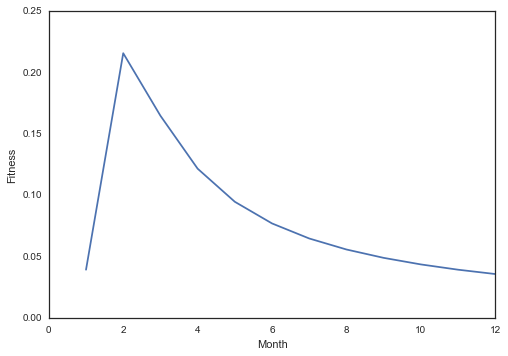

In [11]:
def f(x):
    return (x-0.9)/(np.power(x-1,2) + 1)
"""
Calculating the normalization factor, first we integrate the fraction from 1 to 12
with 1000 trials 1000 times
"""
N = 1000
estimates = [0]*N
for i in range(N):
    X = np.random.randint(low=1, high=13, size=N)
    Y = f(X)
    estimates[i] = np.mean(Y)*12
norm_factor = 1/np.mean(estimates)
print "Normalization factor: ", norm_factor
print "Std Error: ", np.std(estimates)

"""
Now we plot the distribution with this norm_factor
"""
plt.plot(range(1,13), map(lambda x: norm_factor*f(x), range(1,13)))
plt.xlabel("Month")
plt.ylabel("Fitness")

Total samples drawn:  258944
Number of accepted samples:  100000
Time:  2.25089478493


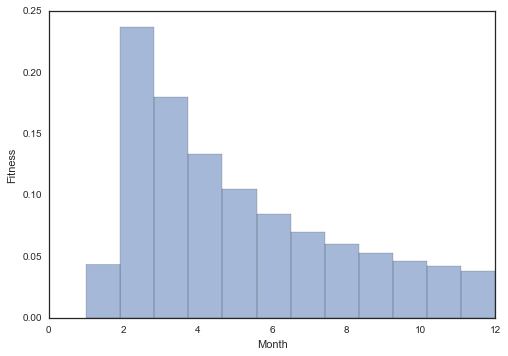

In [12]:
"""
Rejection sampling
"""
start = time.time()
N = 100000
accepted = 0
samples = np.zeros(N)
count = 0

while (accepted < N):
    x = np.random.randint(1, 13)
    y = np.random.uniform(0,f(2)*norm_factor)
    
    if y < f(x)*norm_factor:
        samples[accepted] = x
        accepted += 1
    
    count +=1
    
print "Total samples drawn: ",count
print "Number of accepted samples: ", accepted
print "Time: ", time.time()-start
plt.hist(samples,bins=12, label=u'Samples', alpha=0.5, normed=True);
plt.xlabel("Month")
plt.ylabel("Fitness")

Time:  0.175650835037


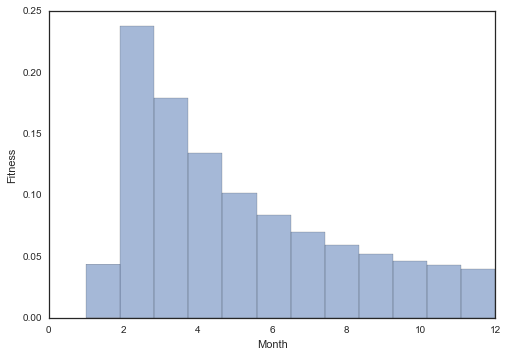

In [13]:
"""
Inverse transform
"""
start = time.time()
N = 100000
lookup = [0]*12
lookup[0] = f(1)*norm_factor
for i in range(1,12):
    lookup[i] = lookup[i-1] + f(i+1)*norm_factor
    
#given random value, return first index with larger cdf
def invLookup(val):
    high = 11
    low = 0
    while high >= low:
        mid = low + (high-low)/2
        if lookup[mid] >= val and (mid == 0 or lookup[mid-1] < val):
            return mid+1
        elif lookup[mid] > val:
            high = mid-1
        else:
            low = mid+1
            
R = np.random.uniform(0,lookup[11],N)
X = map(lambda x: invLookup(x), R)
print "Time: ", time.time() - start
plt.hist(X,bins=12, label=u'Samples', alpha=0.5, normed=True);
plt.xlabel("Month")
plt.ylabel("Fitness")

The inverse transform is much faster because in the case of rejection sampling to get the 100000 points you actually needed to generate 2.5x that many points whereas with the inverse transform each random number generates a point on the distribution. Also making the lookup use binary search added to the speed efficiency. It makes sense to use a lookup table when the distribution is discrete especially because the binary search can be very efficient even for millions of points, whereas if it's continuous like the case of e^(-x) in the lecture notebook it would make more sense to use an anti-derivative

# Problem 5: Give it all!

Estimate the following integral:

$ \int_{-1}^{1} \int_{-1}^{1}  f(x,y) \,dx \,dy$, with 

$g_1(x,y) = -(x+0.4)^2 - (y+0.4)^2 + 0.1$

$g_2(x,y) = -(x-0.4)^2 - (y-0.4)^2 + 0.05$

$f(x,y) = \max(g_1(x,y), 0) + \max(g_2(x,y), 0)$


First use basic Monte Carlo estimation. Then apply different variance reduction techniques we discussed in the lecture: 
* stratified sampling, 
* control variates, 
* importance sampling

For each technique give a short explanation of how you are applying it to the problem. Implement the different techniques and then make a table and compare the results with respect to run-time and error in the estimate. 

You can choose to also either apply and explain antithetic variates, or explain why you don't think they are useful in this case, and how they could benefit of being combined with one of the techniques listed above. 

**Please answer this problem by adding cells here.**

In [14]:
"""
First define functions to g1,g2 and f
"""
def g1(x,y):
    return -np.power(x+0.4,2) - np.power(y+0.4,2) + 0.1
def g2(x,y):
    return -np.power(x-0.4,2) - np.power(y-0.4,2) + 0.05
def f(x,y):
    return np.maximum(g1(x,y),0) + np.maximum(g2(x,y),0)

In [15]:
results = {}

"""
Basic Monte Carlo
volume * average
"""
N = 1000
estimates = [0]*N
volume = 4
start = time.time()
for i in range(N):
    X = np.random.uniform(-1,1,N)
    Y = np.random.uniform(-1,1,N)
    F = f(X,Y)
    estimates[i] = np.mean(F)
results["Basic"] = (np.mean(estimates)*volume, np.std(estimates)*volume, time.time() - start)

In [16]:
"""
Stratified Sampling
Divide xy-block into 10x10 pieces and integrate over each piece and sum together
"""
N = 1000
M = 10.0
step = 2/M
volume = step*step
#loop of trials
start = time.time()
for i in range(N):
    xmin = -1.
    xmax = -1+step
    ymin = -1.
    ymax = -1+step
    sum_est = 0
    #loop through different X strata
    for x_step in range(int(M)):
        #loop through different Y strata
        for y_step in range(int(M)):
            x = np.random.uniform(low=xmin, high=xmax, size=int(N/(M*M)))
            y = np.random.uniform(low=ymin, high=ymax, size=int(N/(M*M)))
            sum_est += np.mean(f(x,y))
            ymin += step
            ymax += step
            if ymax > 1.0:
                ymin = -1.
                ymax = -1.+step
        xmin += step
        xmax += step
    estimates[i] = sum_est
results["Strat"] = (np.mean(estimates)*volume, np.std(estimates)*volume, time.time() - start)

In [17]:
"""
Control variate
Need to find correlated function that we know the integral of
max(g1) and max(g2) are both correlated to f as you can't have the case
where one goes up and the other goes down. We also know that they're both
essentially circles so we can calculate the expected area. So we can use
max(g1) as our similar function to remove some variance
"""
N = 1000
#max(g1) is circle with r^2 of 0.1 and values range from 0 to .1 so average is .1/2
#volume is 2x2
volume = 4
tau = np.pi*(.1)*(.1/2)/volume
start = time.time()
for i in range(N):
    X = np.random.uniform( low=-1, high=1, size=N)
    Y = np.random.uniform( low=-1, high=1, size=N)
    XY = zip(X,Y)
    C = map(lambda x: np.maximum(g1(x[0],x[1]), 0.0), XY)
    F = map(lambda x: f(x[0],x[1]), XY)
    q = np.cov(C,F)
    b =- q[0,1]/np.var(C)
    estimates[i] = np.mean(F) + b *(np.mean(C) - tau)
results["CtrlV"] = (np.mean(estimates)*volume, np.std(estimates)*volume, time.time() - start)

In [18]:
"""
Importance Sampling
Need to find similar distribution that we can sample from.
max(g1) and max(g2) are both circular distributions where
it's higher at the center of the circle. These can be viewed
similarly to multivariate gaussian distributions. Thus, we can
sample from uniform [0,1] and if <.5 sample from one multivariate,
otherwise sample from other (essentially coin flip to choose which
distribution to sample from). From there we can go through the typical
process of importance sampling

Chose the variances in the covariance matrix with the following rationale:
around 2 std deviations gives 95% of the curve, we treat this as the "radius"
so given radius of the circle, the variance we give is (radius/2)^2
"""

N = 1000
g1_mu = [-.4,-.4]
var_1 = np.power(np.sqrt(.1)/2.,2)
var_2 = np.power(np.sqrt(.05)/2.,2)
g1_sig = [[var_1, 0], [0, var_1]]
g2_mu = [.4,.4]
g2_sig = [[var_2, 0], [0, var_2]]
p1 = lambda x: scipy.stats.multivariate_normal.pdf(x, g1_mu, g1_sig)
p2 = lambda x: scipy.stats.multivariate_normal.pdf(x, g2_mu, g2_sig)
p = lambda x: .5*(p1(x)+p2(x))
#normalization factors to get to 1
norm_1 = scipy.stats.mvn.mvnun([-1,-1],[1,1],g1_mu,g1_sig)[0]
norm_2 = scipy.stats.mvn.mvnun([-1,-1],[1,1],g2_mu,g2_sig)[0]
norm = .5*(norm_1+norm_2)
start = time.time()
for i in range(N):
    g1_x = np.random.multivariate_normal(g1_mu,g1_sig,N)
    g2_x = np.random.multivariate_normal(g2_mu,g2_sig,N)
    flips = np.random.uniform(0,1,N)
    g1_x = g1_x[flips<0.5]
    g2_x = g2_x[flips>0.5]
    # make sure samples are in our range
    g1_x = g1_x[(g1_x[:,0]<1)&(g1_x[:,0]>-1)&(g1_x[:,1]<1)&(g1_x[:,1]>-1)]
    g2_x = g2_x[(g2_x[:,0]<1)&(g2_x[:,0]>-1)&(g2_x[:,1]<1)&(g2_x[:,1]>-1)]
    #get the estimates from the corresponding g1/g2 distributions
    g1_est = np.mean(map(lambda x: f(x[0],x[1]), g1_x)/p(g1_x))
    g2_est = np.mean(map(lambda x: f(x[0],x[1]), g2_x)/p(g2_x))
    #average those estimates and normalize
    estimates[i] = (g1_est + g2_est)/2.;
results["ISamp"] = (np.mean(estimates)*norm, np.std(estimates)*norm, time.time() - start)

In [19]:
"""
Antithetic variate
Since these are uniforms over -1,1 we can do the usual take
samples from the uniforms and then also -1*X or -1*Y as well
which are certainly negatively correlated
"""
N = 1000 #only half the samples since we'll be taking 1-X/Y for the other half
volume = 4
start = time.time()
for i in range(N):
    X_1 = np.random.uniform(-1,1,N/2)
    Y_1 = np.random.uniform(-1,1,N/2)
    X_2 = X_1*-1
    Y_2 = Y_1*-1
    estimates[i] = 0.5*(np.mean(f(X_1,Y_1)) + np.mean(f(X_2,Y_2)))
results["AntiT"] = (np.mean(estimates)*volume, np.std(estimates)*volume, time.time() - start)

In [20]:
print "Results of the form (estimate, error, time)"
for technique,result in results.iteritems():
    print technique, result

Results of the form (estimate, error, time)
AntiT (0.019720401531909494, 0.0025283373107946776, 0.3070800304412842)
CtrlV (0.019645329184655041, 0.00071262825750093494, 25.89774799346924)
Strat (0.01958955463253045, 0.0008370980004753384, 5.433874845504761)
ISamp (0.019640757374475151, 0.00031435074918835564, 19.81815004348755)
Basic (0.019531829082051481, 0.0021147680583954703, 0.26213502883911133)


There's a clear tradeoff between runtime and accuracy. The stratified sampling is both relatively quick and accurate. With control variates it requires a lot of calculations to come up with covariance over long series (as N increases this becomes increasingly expensive), and the error was not so much better than the Strat version. The error in the importance sampling is quite a bit better than the Strat method but calculating the pdf's of multivariate gaussians were similarly expensive. There's also an added complexity of choosing the right variances of the multivariate gaussian distributions - just blankly choosing some variance greatly affects the resulting values.

Antithetic variates didn't work so well, this is probably due to the fact that although the X's are negatively correlated, the Y's are not as the circle's symmetric. One possible thing to do is to cut the circles into quarters like in stratified sampling, and then you would have some sense of monotonicity.